# Linear Subspaces and Basis of a Subspace

## Compute Basis via Rank

`torch.linalg.matrix_rank` finds the dimension of the span of the rows (or columns — rank is the same either way).

**Rank** = *number of linearly independent vectors*.

In [1]:
import torch

In [2]:
# Example set of vectors
vectors = [
    torch.tensor([1., 2., 3.]),
    torch.tensor([4., 5., 6.]),
    torch.tensor([7., 8., 9.])
]

In [3]:
# Stack into matrix
mat = torch.stack(vectors)

In [4]:
mat

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [5]:
# Find rank (dimension of span)
rank = torch.linalg.matrix_rank(mat)

In [8]:
rank.item()

2

Why 2?

Let's check linear independence of our vectors. If you look closely:

$(7, 8, 9) = (1, 2, 3) + (4, 5, 6)$

That means vector 3 doesn’t add a new "direction" in space.

We only have two independent directions, so the dimension of the span is $2$, even though you gave it 3 vectors.

## Extract a Basis

We can keep only linearly independent vectors and discard the rest.

In [9]:
def basis_from_vectors(vectors):
    basis = []
    for v in vectors:
        if not basis:
            basis.append(v)
        else:
            mat = torch.stack(basis + [v])
            if torch.linalg.matrix_rank(mat) > len(basis):
                basis.append(v)
    return basis

In [10]:
basis_vectors = basis_from_vectors(vectors)

In [11]:
print("Basis vectors:", basis_vectors)

Basis vectors: [tensor([1., 2., 3.]), tensor([4., 5., 6.])]


In [12]:
print("Basis dimension:", len(basis_vectors))

Basis dimension: 2


> 💡 **Basic** is a set of *linearly independent* vectors that span the space. 

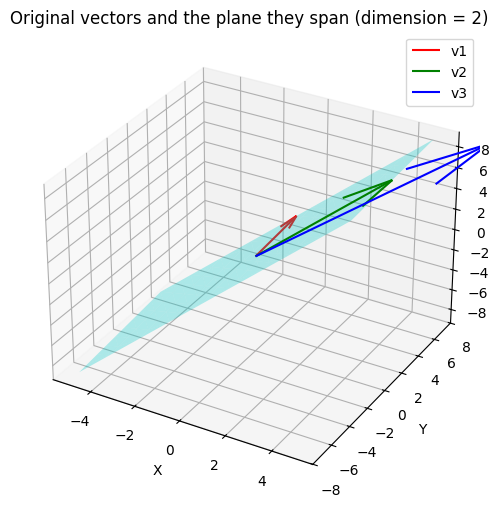

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Original vectors (linearly dependent)
v1 = torch.tensor([1., 2., 3.])
v2 = torch.tensor([4., 5., 6.])
v3 = torch.tensor([7., 8., 9.])

# Basis vectors (first two are independent)
basis = [v1, v2]

# Create a grid of points in the plane spanned by v1 and v2
a_vals = np.linspace(-1, 1, 10)
b_vals = np.linspace(-1, 1, 10)

plane_points = np.array([
    a * v1.numpy() + b * v2.numpy()
    for a in a_vals for b in b_vals
])

# Plot setup
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the plane
ax.plot_trisurf(
    plane_points[:, 0],
    plane_points[:, 1],
    plane_points[:, 2],
    alpha=0.3,
    color='cyan'
)

# Origin
origin = np.zeros(3)

# Plot original vectors
ax.quiver(*origin, *v1.numpy(), color='r', label='v1')
ax.quiver(*origin, *v2.numpy(), color='g', label='v2')
ax.quiver(*origin, *v3.numpy(), color='b', label='v3')

# Labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.set_title("Original vectors and the plane they span (dimension = 2)")

plt.show()

### Three independent vectors spanning $\mathbb{R}^3$

In [14]:
vectors = [
    torch.tensor([1., 0., 0.]),  # along X-axis
    torch.tensor([0., 1., 0.]),  # along Y-axis
    torch.tensor([0., 0., 1.])   # along Z-axis
]

In [15]:
mat = torch.stack(vectors)

In [16]:
mat

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [17]:
rank = torch.linalg.matrix_rank(mat)

In [18]:
print("Dimension of span:", rank.item())

Dimension of span: 3


These three vectors are:

- **Independent** — none can be made from the others
- **Span** — any vector in 3D space can be expressed as $a(1,0,0)+b(0,1,0)+c(0,0,1)$

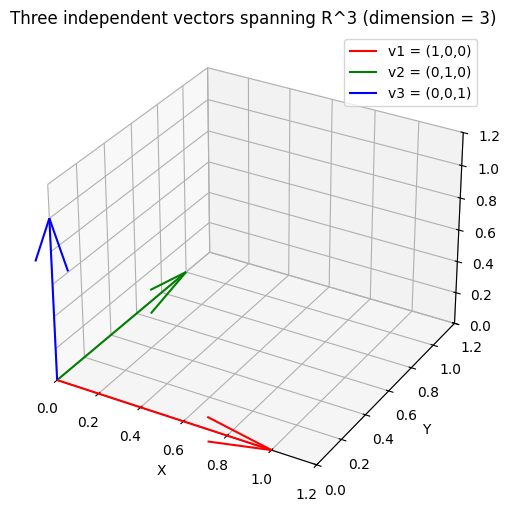

In [20]:
# Three independent vectors
v1 = torch.tensor([1., 0., 0.])  # X-axis
v2 = torch.tensor([0., 1., 0.])  # Y-axis
v3 = torch.tensor([0., 0., 1.])  # Z-axis

# Plot setup
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Origin
origin = np.zeros(3)

# Plot vectors
ax.quiver(*origin, *v1.numpy(), color='r', label='v1 = (1,0,0)')
ax.quiver(*origin, *v2.numpy(), color='g', label='v2 = (0,1,0)')
ax.quiver(*origin, *v3.numpy(), color='b', label='v3 = (0,0,1)')

# Labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0, 1.2])
ax.set_ylim([0, 1.2])
ax.set_zlim([0, 1.2])
ax.legend()
ax.set_title("Three independent vectors spanning R^3 (dimension = 3)")

plt.show()